# Solving the n-Queens Problem using Local Search

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]


## Learning Outcomes

* Implement multiple hill climbing search variants to solve the n-Queens problem.
* Apply simulated annealing with appropriate temperature scheduling to overcome local optima.
* Compare algorithmrithm performance using runtime, solution quality, and success rate metrics.
* Analyze and visualize algorithm performance across different problem sizes.
* Graduate Students: Design and test alternative local move operators to improve search efficiency.

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


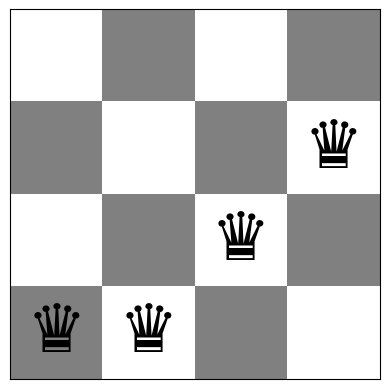

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [29]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


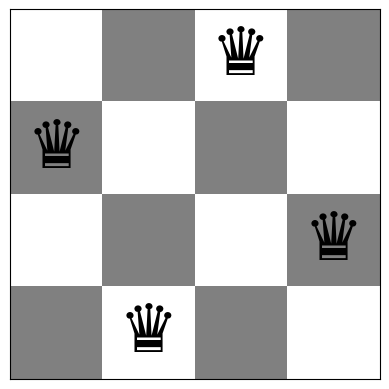

In [30]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [20 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

Bước 0: Số xung đột = 5
Bước 1: Số xung đột = 3
Bước 2: Số xung đột = 2
Bước 3: Số xung đột = 1
Bước 4: Số xung đột = 0
Đã tìm thấy nghiệm hoàn hảo ở bước 4
Board with 0 conflicts.


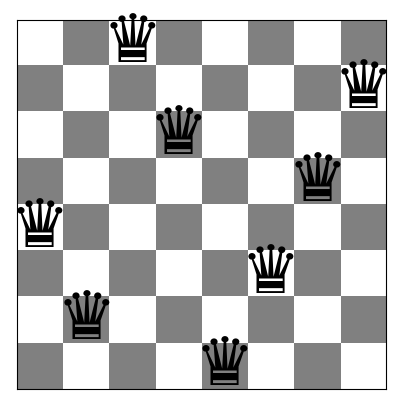

Số xung đột cuối cùng: 0, Số bước: 5, Thời gian: 0.0104 giây


In [31]:
# Code and description go here
import numpy as np
import time

def steepest_ascent_hill_climbing(n, max_steps=10000, verbose=False):
    """
    Thuật toán Leo đồi dốc nhất (Steepest-Ascent Hill Climbing) cho bài toán N-Queens.
    - n: kích thước bàn cờ (n x n)
    - max_steps: số bước lặp tối đa (phòng trường hợp không hội tụ)
    - verbose: nếu True thì in tiến trình từng bước
    Trả về: (bàn cờ tốt nhất, số xung đột cuối cùng, số bước, thời gian chạy)
    """
    start_time = time.time()
    board = random_board(n)
    conf = conflicts(board)
    for step in range(max_steps):
      best_neighbor = board.copy()
      best_conf = conf
      for col in range(n):
        for row in range(n):
          if row == board[col] :
            continue
          neighbor = board.copy()
          neighbor[col] = row
          next_conf = conflicts(neighbor)
          if next_conf < best_conf:
            best_conf = next_conf
            best_neighbor = neighbor.copy()
      if best_conf >= conf:
        break
      else:
        board = best_neighbor
        conf = best_conf
      if verbose:
        print(f"Bước {step}: Số xung đột = {conf}")
      if conf == 0:
        if verbose:
          print(f"Đã tìm thấy nghiệm hoàn hảo ở bước {step}")
        break
    end_time = time.time() - start_time
    return board, conf, step + 1, end_time



# --- Ví dụ chạy thử ---
n = 8
solution, conf, steps, t = steepest_ascent_hill_climbing(n, verbose=True)
show_board(solution)
print(f"Số xung đột cuối cùng: {conf}, Số bước: {steps}, Thời gian: {t:.4f} giây")


## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

Bước 0: Số xung đột = 6
Bước 1: Số xung đột = 4
Bước 2: Số xung đột = 2
Bước 3: Số xung đột = 1
Board with 1 conflicts.


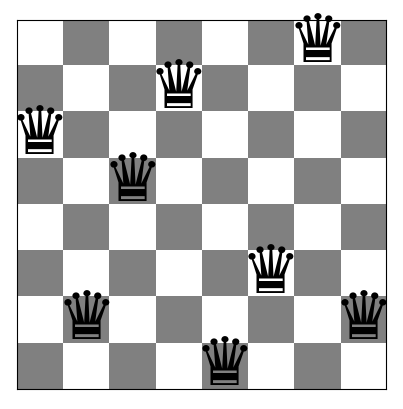

Số xung đột cuối cùng: 1, Số bước: 5, Thời gian: 0.0039 giây


In [32]:
# Code and description go here
import random
def random_choice(boards):
    return random.choice(boards)
def Stochastic_hill_climbing(n, max_steps=10000, verbose=False):
    """
    Thuật toán Hill Climbing ngẫu nhiên (Stochastic Hill Climbing)
    Tạo 1 danh sách better_neighbor lưu tất cả các board tốt hơn board hiện tại
    Chọn ngẫu nhiên 1 board trong danh sách better_neighbor
    n : kích thước bàn cờ (n x n)
    max_steps : số bước lặp tối đa (phòng trường hợp không hội tụ)
    verbose : nếu True thì in tiến trình từng bước
    """
    start_time = time.time()
    board = random_board(n)
    cur_conf = conflicts(board)
    for step in range(max_steps):
      better_neighbor = []                    # Reset danh sách sau mỗi vòng lặp mới
      for col in range(n):
        for row in range(n):
          if row == board[col]:
            continue
          neighbor = board.copy()
          neighbor[col] = row
          next_conf = conflicts(neighbor)
          if next_conf < cur_conf:
            better_neighbor.append(neighbor)
      if not better_neighbor:                # Kiểm tra better_neighbor có không rỗng không
        break
      else:
        board = random_choice(better_neighbor)
        cur_conf = conflicts(board)
      if cur_conf == 0:
        if verbose:
          print(f"Đã tìm thấy nghiệm hoàn hảo ở bước {step}")
        break
      if verbose:
        print(f"Bước {step}: Số xung đột = {cur_conf}")
    end_time = time.time() - start_time
    return board, cur_conf, step + 1, end_time
result, conf, steps, t = Stochastic_hill_climbing(n, verbose=True)
show_board(result)
print(f"Số xung đột cuối cùng: {conf}, Số bước: {steps}, Thời gian: {t:.4f} giây")



## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Bước 1: Số xung đột = 7
Bước 2: Số xung đột = 6
Bước 3: Số xung đột = 6
Bước 4: Số xung đột = 5
Bước 6: Số xung đột = 5
Bước 7: Số xung đột = 5
Bước 8: Số xung đột = 4
Bước 9: Số xung đột = 4
Bước 10: Số xung đột = 4
Bước 11: Số xung đột = 4
Bước 13: Số xung đột = 4
Bước 14: Số xung đột = 4
Bước 15: Số xung đột = 4
Bước 16: Số xung đột = 4
Bước 17: Số xung đột = 3
Bước 18: Số xung đột = 3
Bước 19: Số xung đột = 3
Bước 20: Số xung đột = 3
Bước 21: Số xung đột = 2
Bước 22: Số xung đột = 2
Bước 23: Số xung đột = 2
Bước 24: Số xung đột = 2
Bước 25: Số xung đột = 2
Bước 27: Số xung đột = 2
Bước 28: Số xung đột = 2
Bước 29: Số xung đột = 2
Bước 30: Số xung đột = 2
Bước 31: Số xung đột = 2
Bước 32: Số xung đột = 2
Bước 34: Số xung đột = 2
Bước 36: Số xung đột = 2
Bước 37: Số xung đột = 2
Bước 38: Số xung đột = 2
Bước 39: Số xung đột = 2
Bước 40: Số xung đột = 2
Bước 41: Số xung đột = 2
Bước 42: Số xung đột = 2
Bước 44: Số xung đột = 2
Bước 45: Số xung đột = 2
Bước 46: Số xung đột = 2
Bước 47:

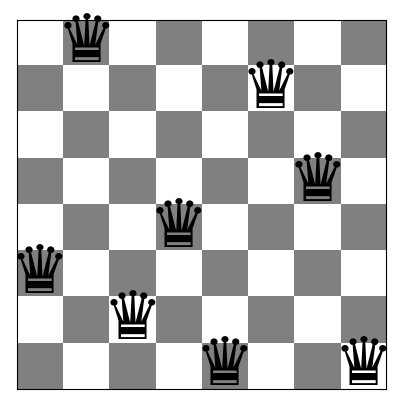

Số xung đột cuối cùng: 1, Số bước: 127, Thời gian: 0.0017 giây


In [33]:
# Code and description go here
def first_choice_hill_climbing(n,max_steps=10000, max_tries=100,verbose=False):
  """
  Thuật toán first-choice Hill Climbing
  Tạo 1 neighbor ngẫu nhiên tại mỗi bước thay vì duyệt hết tất cả neighbor như đã làm ở task 2
  n : kích thước bàn cờ (n x n)
  max_steps : Số bước lặp tối đa (phòng trường hợp không hội tụ)
  max_tries : Số lần lặp không cải thiện để dừng thuật toán
  verbose : Nếu True thì in tiến trình từng bước
  """
  start_time = time.time()
  board = random_board(n)
  cur_conf = conflicts(board)
  no_improve = 0
  for step in range(1,max_steps):
    if no_improve > max_tries:
      break
    col = random.randint(0,n-1)
    row = random.randint(0,n-1)
    if row == board[col]:
      continue
    neighbor = board.copy()
    neighbor[col] = row
    nei_conf = conflicts(neighbor)
    if nei_conf < cur_conf:
      board = neighbor
      cur_conf = nei_conf
    else:
      no_improve += 1
    if cur_conf == 0:
      if verbose:
        print(f"Đã tìm thấy nghiệm hoàn hảo ở bước {step}")
      break
    if verbose:
      print(f"Bước {step}: Số xung đột = {cur_conf}")
  end_time = time.time() - start_time
  return board, cur_conf, step, end_time
result, conf, steps, t = first_choice_hill_climbing(n, verbose=True)
show_board(result)
print(f"Số xung đột cuối cùng: {conf}, Số bước: {steps}, Thời gian: {t:.4f} giây")


## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

-------------------> Steepest-ascend Hill Climbing <-------------------
Số xung đột: 0
Thời gian thực thi: 0.2929 s
Board with 0 conflicts.


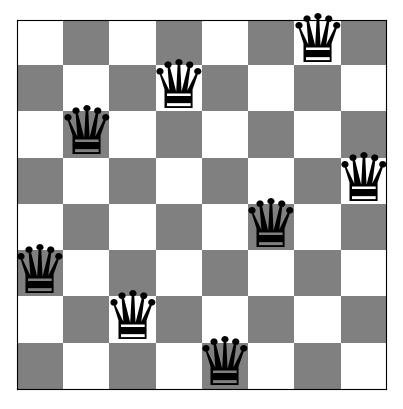

-------------------> Stochastic Hill Climbing 1 <-------------------
Số xung đột: 0
Thời gian thực thi: 0.4247 s
Board with 0 conflicts.


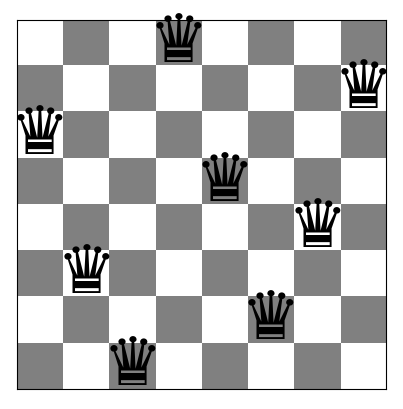

-------------------> Stochastic Hill Climbing 2 <-------------------
Số xung đột: 0
Thời gian thực thi: 0.1173 s
Board with 0 conflicts.


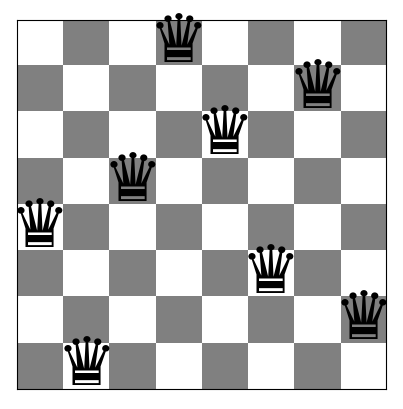

In [ ]:
# Code and description go here
def random_restarts(n, hill_climbing, epochs, verbose=False):
    best_board = None
    best_conf = float('inf')
    total_steps = 0
    start_time = time.time()
    for i in range(1,epochs+1):
        board, cur_conflict, steps, _ = hill_climbing(n)
        total_steps += steps
        if verbose:
                print(f"Restart lần {i}: số xung đột = {cur_conflict}")
        if cur_conflict < best_conf:
            best_conf = cur_conflict
            best_board = board
    total_time = round(time.time() - start_time,4)
    return best_board, best_conf, total_time

def show_result_task4(board, total_conf,  total_time):
    print(f"Số xung đột: {total_conf}\n"
          f"Thời gian thực thi: {total_time} s")
    show_board(board)


# n: kích thước bàn cờ 
# n = 4 để sài trong task 4
board_size = 8
epochs = 100
print('-------------------> Steepest-ascend Hill Climbing <-------------------')
board1, conf1, total_time1 = random_restarts(board_size, steepest_ascent_hill_climbing, epochs)
show_result_task4(board1, conf1, total_time1)
print('-------------------> Stochastic Hill Climbing 1 <-------------------')
board2, conf2, total_time2 = random_restarts(board_size, Stochastic_hill_climbing, epochs)
show_result_task4(board2, conf2, total_time2)
print('-------------------> Stochastic Hill Climbing 2 <-------------------')
board3, conf3, total_time3 = random_restarts(board_size, first_choice_hill_climbing, epochs)
show_result_task4(board3, conf3, total_time3)

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Create a visualization of the search process (a line chart of how the number if conflict changes as the algorithm progrsses).
3. Use this visualization for experiments with different choices for the annealing schedule and discuss what you have learned.

Board with 1 conflicts.


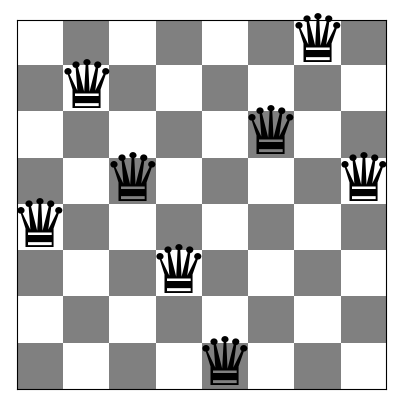

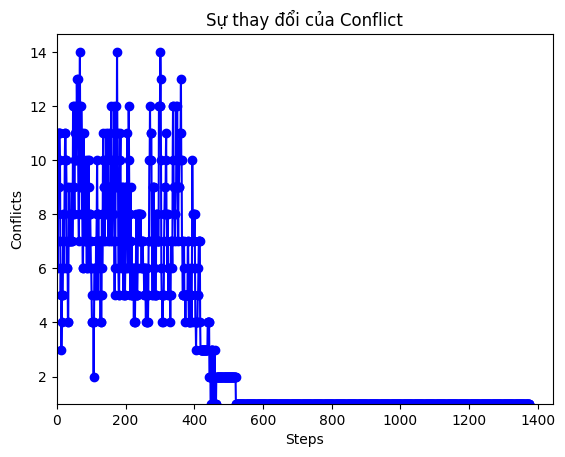

<-------- T0: 200 + Alpha: 0.99 -------->
Conflicts: 0 - steps: 1088 - total_time: 0.0146
Board with 0 conflicts.


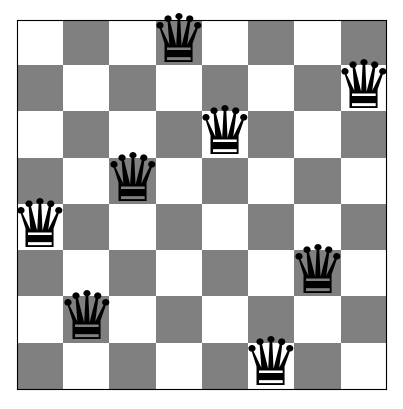

<-------- T0: 200 + Alpha: 0.9 -------->
Conflicts: 2 - steps: 138 - total_time: 0.001
Board with 2 conflicts.


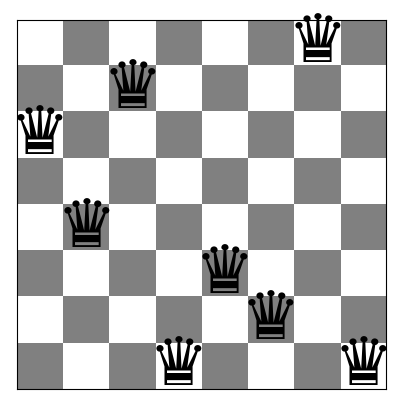

<-------- T0: 200 + Alpha: 0.5 -------->
Conflicts: 5 - steps: 21 - total_time: 0.001
Board with 5 conflicts.


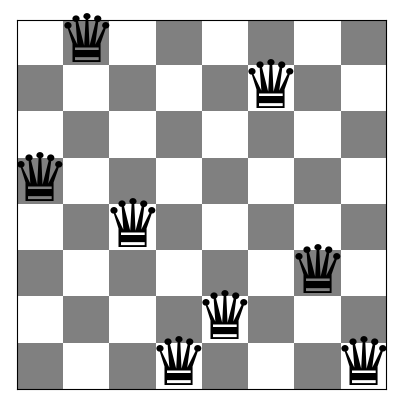

<-------- T0: 100 + Alpha: 0.99 -------->
Conflicts: 0 - steps: 942 - total_time: 0.0066
Board with 0 conflicts.


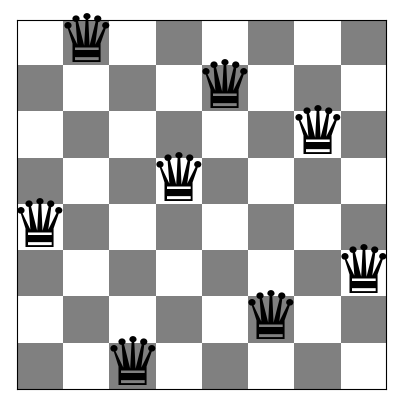

<-------- T0: 100 + Alpha: 0.9 -------->
Conflicts: 3 - steps: 132 - total_time: 0.0074
Board with 3 conflicts.


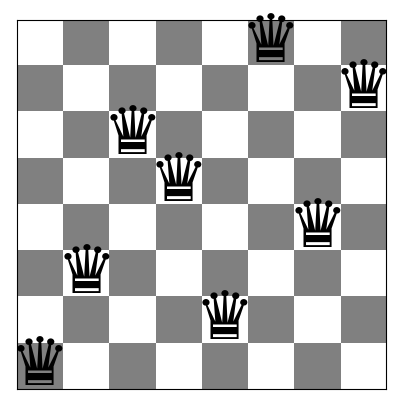

<-------- T0: 100 + Alpha: 0.5 -------->
Conflicts: 5 - steps: 20 - total_time: 0.0
Board with 5 conflicts.


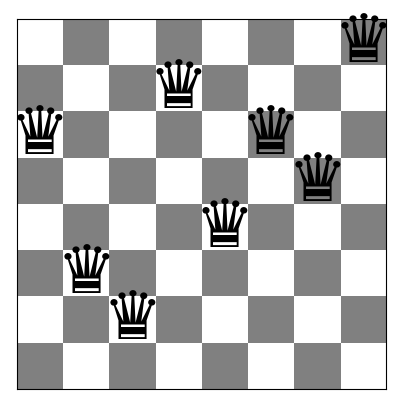

<-------- T0: 50 + Alpha: 0.99 -------->
Conflicts: 1 - steps: 1306 - total_time: 0.0193
Board with 1 conflicts.


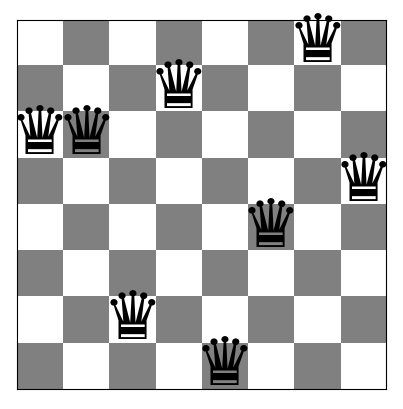

<-------- T0: 50 + Alpha: 0.9 -------->
Conflicts: 2 - steps: 125 - total_time: 0.001
Board with 2 conflicts.


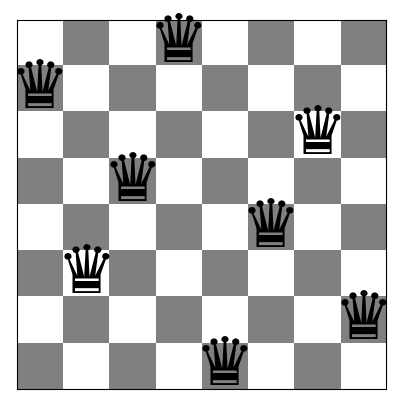

<-------- T0: 50 + Alpha: 0.5 -------->
Conflicts: 3 - steps: 19 - total_time: 0.0
Board with 3 conflicts.


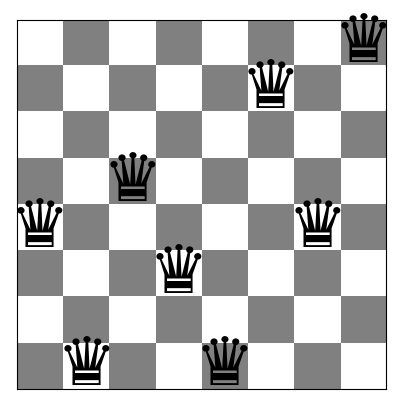

In [ ]:
# Code and description go here
import random
import math
import matplotlib.pyplot as plt

def simulated_annealing(n, T0 = 100, alpha = 0.99, max_steps = 10000):
    board = random_board(n)
    cur_conflicts = conflicts(board)
    best_board = board.copy()
    best_conflicts = cur_conflicts
    steps = 0
    T = T0
    conf_storage = []
    start_time = time.time()
    for step in range(max_steps):
        if cur_conflicts == 0 or T < 0.0001:
            steps = step
            break
        col = random.randint(0, n-1)
        new_row = random.randint(0, n-1)
        while new_row == board[col]:
            new_row = random.randint(0, n-1)
        new_board = board.copy()
        new_board[col] = new_row
        new_conflicts = conflicts(new_board)
        delta = new_conflicts - cur_conflicts
        if delta < 0:
            cur_conflicts = new_conflicts
            board = new_board
        else:
            if random.random() < math.exp(-delta/T):
                board = new_board
                cur_conflicts = new_conflicts
        if cur_conflicts < best_conflicts:
            best_conflicts = cur_conflicts
            best_board = board.copy()
        T = T*alpha
        conf_storage.append(cur_conflicts)
    total_time = round(time.time() - start_time,4)
    return best_board, best_conflicts, steps, total_time, conf_storage

def visualize_conflicts(steps, conflicts_storage):
    plt.plot(range(1,steps+1), conflicts_storage, color="blue", marker="o", linestyle = "-")
    plt.title("Sự thay đổi của Conflict")
    plt.ylabel("Conflicts")
    plt.xlabel("Steps")
    plt.xlim(left = 0)
    plt.ylim(bottom = 1)
    plt.show()

def annealing_schedule(n):
    schedule = {
        "T0": [200, 100, 50],
        "alpha": [0.99, 0.9, 0.5]
    }
    results = []
    for t in schedule['T0']:
        for a in schedule['alpha']:
            board, total_conflicts, steps, total_time, conf_storage = simulated_annealing(n, t, a)
            results.append({
                "T0": t,
                "alpha": a,
                "board": board,
                "conflicts": total_conflicts,
                "steps": steps,
                "total_time": total_time,
                "conf_storage": conf_storage
            })
    return results

def show_results(results):
    for rs in results:
        print(f"<-------- T0: {rs["T0"]} + Alpha: {rs["alpha"]} -------->")
        print(f"Conflicts: {rs["conflicts"]} - steps: {rs["steps"]} - total_time: {rs["total_time"]}")
        show_board(rs["board"])

n = 8
board, total_conflicts, steps, total_time, conf_storage = simulated_annealing(n)
show_board(board)
visualize_conflicts(steps, conf_storage)
results = annealing_schedule(n)
show_results(results)

## Task 6: Algorithm Behavior Analysis [20 Points]

### Comparison
Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

Add the used code here:

In [ ]:
# Code
import pandas as pd
board_sizes = [4, 8]
algorithms = {
    "Steepest asc. HC": steepest_ascent_hill_climbing,
    "Stochastic HC 1": Stochastic_hill_climbing,
    "Stochastic HC 2": first_choice_hill_climbing,
    "Simulated Annealing": simulated_annealing
}
def compare_algorithm(board_sizes, algorithms, epochs=100):
    results = []
    for size in board_sizes:
        for name, algorithm in algorithms.items():
            total_times = 0
            total_conflicts = 0
            total_runcomplete = 0
            for _ in range(epochs):
                if name != "Simulated Annealing":
                    _, cur_conflicts, _, time = algorithm(size)
                else:
                    _, cur_conflicts, _, time, _ = algorithm(size)
                if cur_conflicts == 0:
                    total_runcomplete += 1
                total_times += time
                total_conflicts += cur_conflicts
            results.append((name, size, round(total_times*1000/100,4), total_conflicts/100, total_runcomplete/100*100))
    table = pd.DataFrame(results, columns=["Algorithm", "Board size", "Avg. Run time (ms)",
                                            "Avg. number of conflicts", "% of runs ending in optimal solution"])
    return table
 
df = compare_algorithm(board_sizes, algorithms)
df

,Algorithm,Board size,Avg. Run time (ms),Avg. number of conflicts,% of runs ending in optimal solution
0,Steepest asc. HC,4,0.2601,0.87,23.0
1,Stochastic HC 1,4,0.1845,0.84,36.0
2,Stochastic HC 2,4,0.6556,0.82,33.0
3,Simulated Annealing,4,1.0130,0.00,100.0
4,Steepest asc. HC,8,2.5557,1.25,18.0
5,Stochastic HC 1,8,3.4364,1.33,10.0
6,Stochastic HC 2,8,1.1531,1.54,6.0
7,Simulated Annealing,8,11.5080,0.20,80.0


### Algorithm Convergence

For each algorithm implemented, describe the typical convergence pattern (fast initial improvement vs. steady progress).
Include a plot showing the objective function value over iterations for one representative run of each algorithm on the 8-queens problem.
Explain which algorithms exhibit plateaus or getting stuck in local optima most frequently.

Board with 0 conflicts.


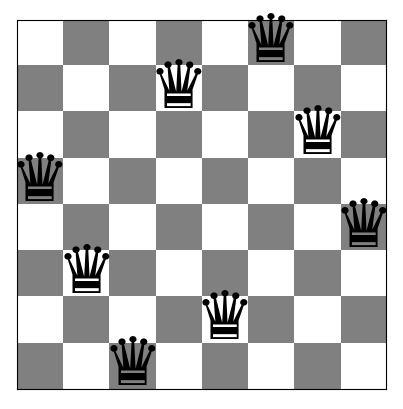

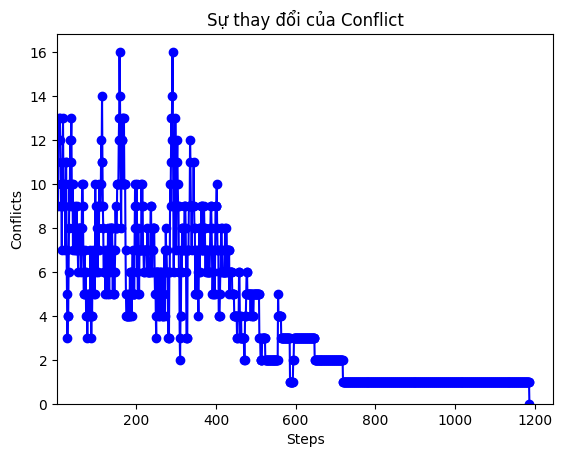

In [43]:
import matplotlib.pyplot as plt

def visualize_conflicts(steps, conflicts_storage):
    plt.plot(range(1, steps+1), conflicts_storage, color="blue", marker="o", linestyle="-")
    plt.title("Sự thay đổi của Conflict")
    plt.xlabel("Steps")
    plt.ylabel("Conflicts")
    plt.xlim(left=1)
    plt.ylim(bottom=0)
    plt.show()

n = 8
board, total_conflicts, steps, total_time, conf_storage = simulated_annealing(n)
show_board(board)
visualize_conflicts(steps, conf_storage)

### Problem Size Scalability

Create a log-log plot showing how runtime scales with board size ($n=4, 8, 12, 16, 20$) for at least two algorithms.
Estimate the empirical time complexity (Big O) for each algorithm based on your results.
Identify which algorithm scales best for large problem sizes and explain why.

In [57]:
# Code and description go here

## Advanced task: Exploring other Local Moves Operators

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

### Move Operator Implementation

Implement the following local move operators:

* Single-step move: Move one queen only one square up or down at a time
* Column swap: Exchange the positions of queens in two randomly selected columns
* Dual-queen move: Select two queens and move both simultaneously
* Adaptive move: Design your own operator that adapts which local move it uses based on the current state (e.g., focuses on queens with most conflicts or randomly chooses one of the moves above)

### Experimental Analysis

Using the 8-Queens and 12-Queens problems: Run your Stochastic Hill Climbing 2 implementation with each move operator 100 times
For each operator, create a visualization showing:

* Average solution quality over iterations
* Distribution of final solution qualities
* Average time to solution for successful runs

### Discussion

Describe what you have learned from the experiments. Which operator works best for which situation and why?

In [39]:
# Code and description go here

## More Things to Do (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment.

### Implement a Genetic Algorithm for the n-Queens problem

In [40]:
# Code and description go here